In [18]:
using LinearAlgebra, DataFrames, CSV, ProgressMeter
Base.:(+)(a::String, b::String) = string(a,b)
pwd()

"/run/media/kryohi/Data/Uni/Tesi/cas9_md/notebooks"

In [2]:
plotpath = "../plots/";
datapath = "../data/analysis/";
output_name = "prod_global_";

In [3]:
using CairoMakie

┌ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]
└ @ Base loading.jl:1342


In [12]:
function pairplot(df; stride=10, colormap=:thermal, resolution=(1400,1400))
    
    dim = size(df,2) # how many colums there are in the dataframe
    idxs = 1:stride:size(df,1)
    colorant = range(0, 1, length=length(idxs))

    pp_theme = Attributes(
        Axis = (
            aspect = 1,
            topspinevisible = false,
            rightspinevisible = false,
            xticklabelsvisible = false,
            yticklabelsvisible = false
        ),
        Scatter = (
            colormap = colormap, # try :thermal :Oranges_9, :darkrainbow
            markersize = 6
        )
    )

    f = with_theme(pp_theme) do
        f = Figure(resolution=resolution)

        for i in 1:dim, j in 1:dim

            ax = Axis(f[i, j])
            scatter!(df[idxs,j], df[idxs,i], color = colorant)

            if i==dim
                ax.xticklabelsvisible = true
                ax.xlabel = names(df)[j]
            end
            if j==1
                ax.yticklabelsvisible = true
                ax.ylabel = names(df)[i]
            end

        end
        f
    end
end


pairplot (generic function with 1 method)

In [13]:
df = DataFrame(CSV.File("../data/analysis/pca.csv"));
df_time = df[:,end];
df = df[:,1:end-1];

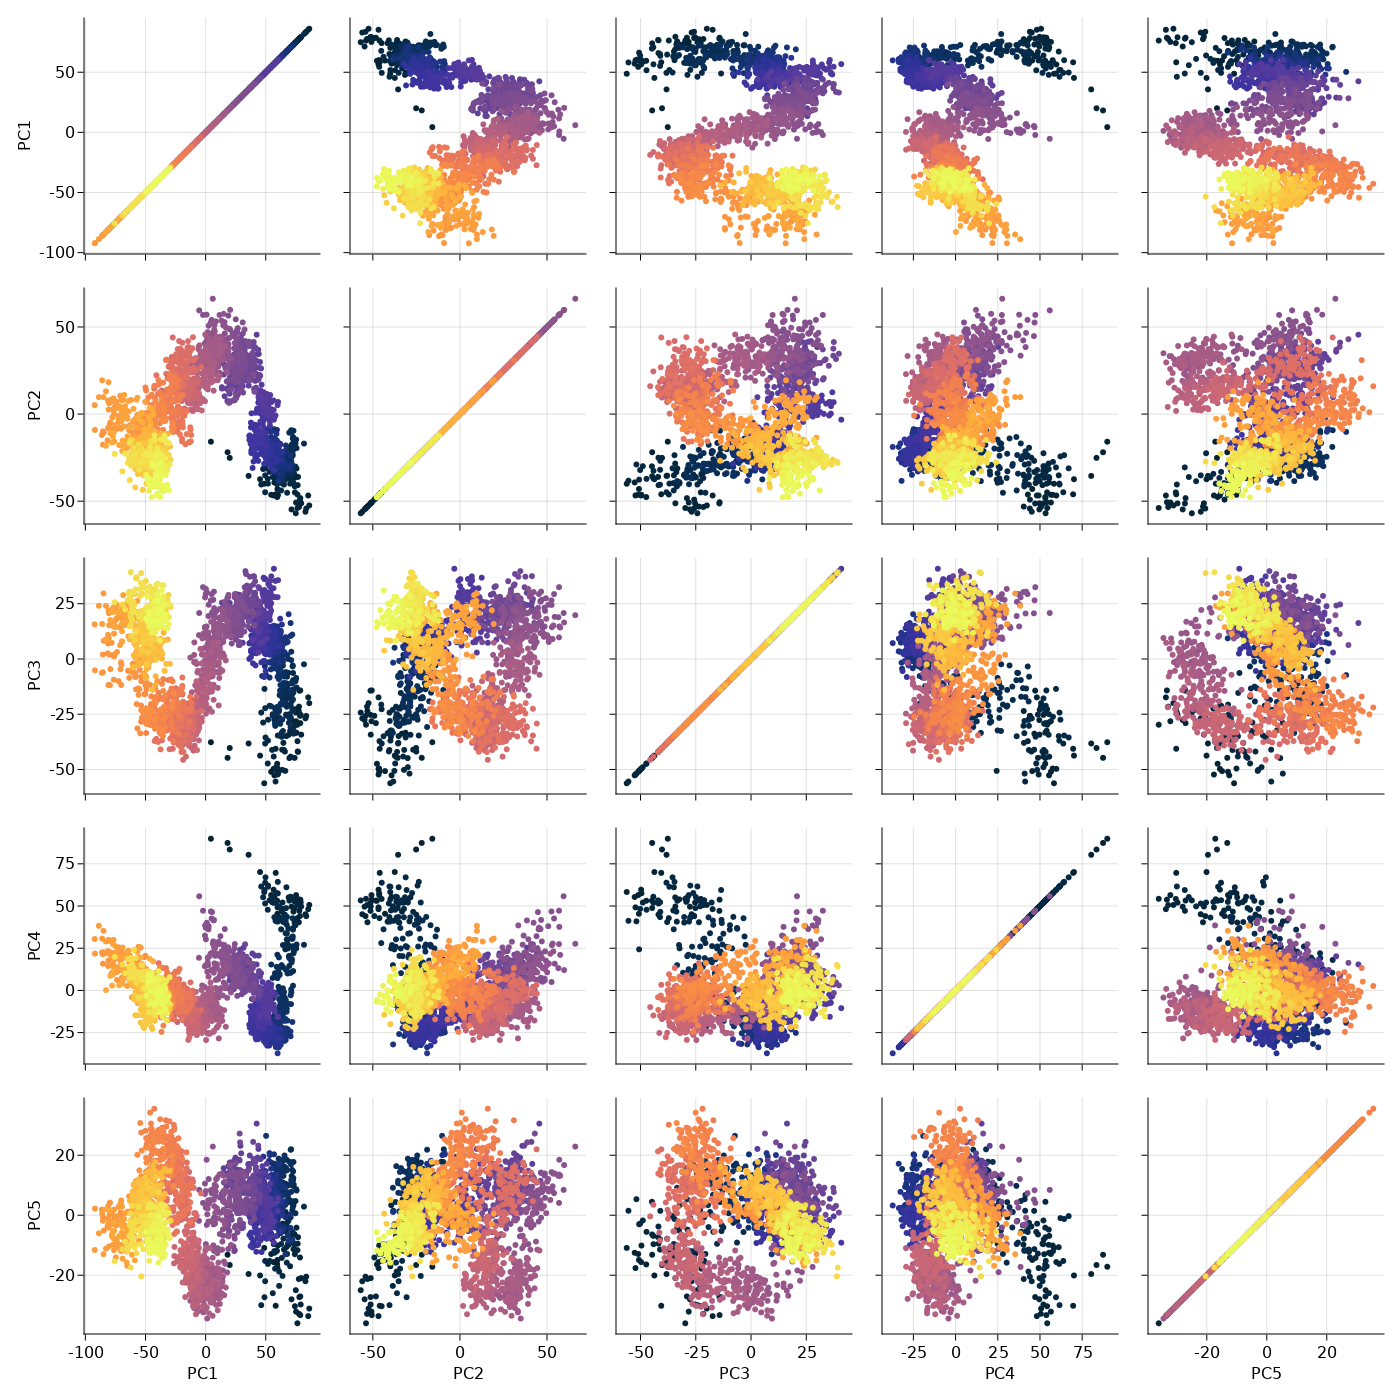

In [15]:
pp = pairplot(df, stride=2)

In [19]:
save(plotpath+"test_makie_pp.pdf", pp)


CairoScreen{Cairo.CairoSurfaceIOStream{UInt32}} with surface:
Cairo.CairoSurfaceIOStream{UInt32}(Ptr{Nothing} @0x0000563a03dfaac0, 1050.0, 1050.0, IOContext(IOStream(<file /run/media/kryohi/Data/Uni/Tesi/cas9_md/plots/test_makie_pp.pdf>)))
